# Jupyter notebook demonstrating some functions from the Tigramite package

In [1]:
# Go to tigramite directory
# cd work/code/python_code/tigramite/tigramite_v2/tigramite/

In [2]:
# Imports
import numpy
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}
#plt.style.use('ggplot')

from tigramite_src import tigramite_preprocessing as pp
from tigramite_src import tigramite_estimation_beta as tig
from tigramite_src import tigramite_plotting

In [3]:
# Example process to play around with
a = .7
c1 = .6
c2 = -.6
c3 = .8
T = 1000
# Each key refers to a variable and the incoming links are supplied as a
# list of format [((driver, lag), coeff), ...]
links_coeffs = {0: [((0, -1), a)],
                1: [((1, -1), a), ((0, -1), c1)],
                2: [((2, -1), a), ((1, -2), c2)],
                3: [((3, -1), a), ((0, -3), c3)],
                }

fulldata, true_parents_neighbors = pp.var_process(links_coeffs,
                                                  use='inv_inno_cov', T=T)
T, N = fulldata.shape
datatime = numpy.arange(len(fulldata))
var_names = ['X', 'Y', 'Z', 'W']

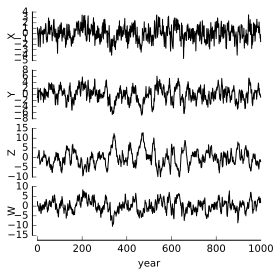

In [4]:
# Plot data
fig, axes = plt.subplots(N, sharex=True,
                            frameon=False, figsize=(4, 4))

for i in range(N):
    tigramite_plotting.add_timeseries(
        fig=fig, axes=axes, i=i,
        time=datatime,
        dataseries=fulldata[:, i],
        label=var_names[i],
        last=(i == N - 1),
        time_label='year',
    )

In [5]:
# Estimate parents for all variables
tau_max = 5
measure = 'par_corr'
significance = 'analytic'
sig_lev = 0.999
parents = tig.pc_algo_all(data=fulldata, estimate_parents_neighbors='parents',
                tau_max=tau_max, measure=measure, significance=significance, sig_lev=sig_lev)
print parents

{0: [(0, -1)], 1: [(1, -1), (0, -1)], 2: [(2, -1), (1, -2)], 3: [(3, -1), (0, -3)]}


In [6]:
# Now estimate lag functions for measure MIT using the parents
# Here another significance level can be chosen...
cond_measure = 'parents_xy'
lagfuncs, sig_thres, confs = tig.get_lagfunctions(data=fulldata, 
                     parents_neighbors=parents,
                     cond_mode=cond_measure,
                     tau_max=tau_max,
                     measure=measure,
                     significance=significance, sig_lev=sig_lev
                     )

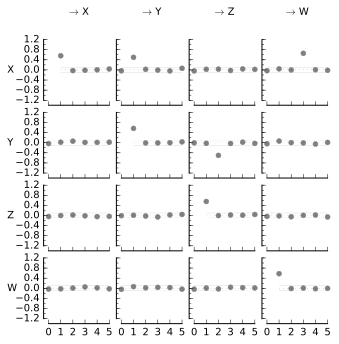

In [7]:
# Plot lag functions
lag_func_matrix = tigramite_plotting.setup_matrix(
    N=N,
    figsize=(5, 5),
    tau_max=tau_max,
    var_names=var_names)
lag_func_matrix.add_lagfuncs(
    lagfuncs=lagfuncs,
    sig_thres=sig_thres,
    conf=confs,
    markersize=10,
)

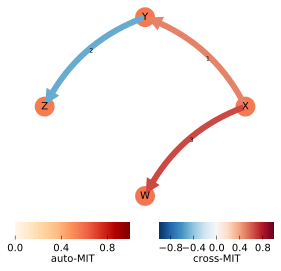

In [8]:
# Plot graph
fig = plt.figure(figsize=(4, 4), frameon=False)
ax = fig.add_subplot(111, frame_on=False)

tigramite_plotting.plot_graph(
    fig=fig, ax=ax,
    lagfuncs=lagfuncs,
    sig_thres=sig_thres,
    var_names=var_names,
    link_colorbar_label='cross-MIT',
    node_colorbar_label='auto-MIT',
)
fig.subplots_adjust(left=0.1, right=.9, bottom=.25, top=.95)

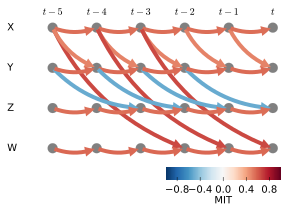

In [9]:
# Plot time series graph
fig = plt.figure(figsize=(4, 3), frameon=False)
ax = fig.add_subplot(111, frame_on=False)

tigramite_plotting.plot_time_series_graph(
     fig=fig, ax=ax,
    lagfuncs=lagfuncs,
    sig_thres=sig_thres,
    var_names=var_names,
    link_colorbar_label='MIT',
        )
fig.subplots_adjust(left=0.1, right=.98, bottom=.25, top=.9)
